# Outliers analysis

## segment 8 : extreme value analysis using univariate methods

In [29]:
# import libraries
import numpy as np
import pandas as pd

from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb
import os

In [30]:
# predefine format
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [31]:
# get data
cwd = os.getcwd()
iris_data = cwd + '/linkedin-data/iris.data.csv'

df = pd.read_csv(	filepath_or_buffer=iris_data,
					header=None, # to tell that our data have no data
					# sep=',' # since it is csv_read, it might not be necessary there
)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# select data
# X = df.loc[:,0:4] # loc = access by 'label'
# X = df.iloc[:, :4] # w/o '.values', we will get the table
X = df.iloc[:, :4].values # w/ '.values', we will get the values in the array
y = df.iloc[:,4].values

# display result
print(X)
print(y)
df[:5] # display first 5 rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### identifying outliers from tukey boxplots

[]

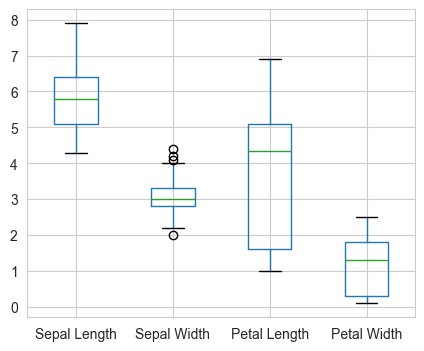

In [33]:
# plot a boxplot
df.boxplot(return_type='dict')
plt.plot()

In [34]:
# manage outliers

# store backup data
Sepal_Width = X[:,1]

# store outliers
iris_outlier = (Sepal_Width > 4) | (Sepal_Width < 2.05)
# print(iris_outlier)

# display data
df[iris_outlier]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


### applying tukey outliers labeling

In [35]:
# predefine format
pd.options.display.float_format = '{:.1f}'.format

In [36]:
# label
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [37]:
# Q1 in Sepal_width = 2.8
# Q3 in Sepal_width = 3.3
# IQR = Q3 - Q1 = 3.3 - 2.8 = 0.5
# THEREFORE
# (1.5) * IQR = 1.5 * 0.5 = 0.75
# OUTLIER FROM Q1 = 2.8 - 0.75 = 2.05
# OUTLIER FROM Q3 = 3.3 + 0.75 = 4.05

## segment 9 : multivariate analysis for outlier detection

### visually inspecting boxplots

<AxesSubplot: xlabel='Species', ylabel='Sepal Length'>

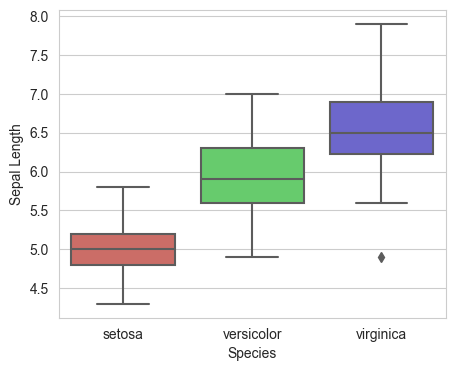

In [43]:
# define data
data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values

df[:5]
sb.boxplot(	x='Species',
			y='Sepal Length',
			data=df,
			palette='hls' # color of the figure
)

### looking at scatterplot matrix

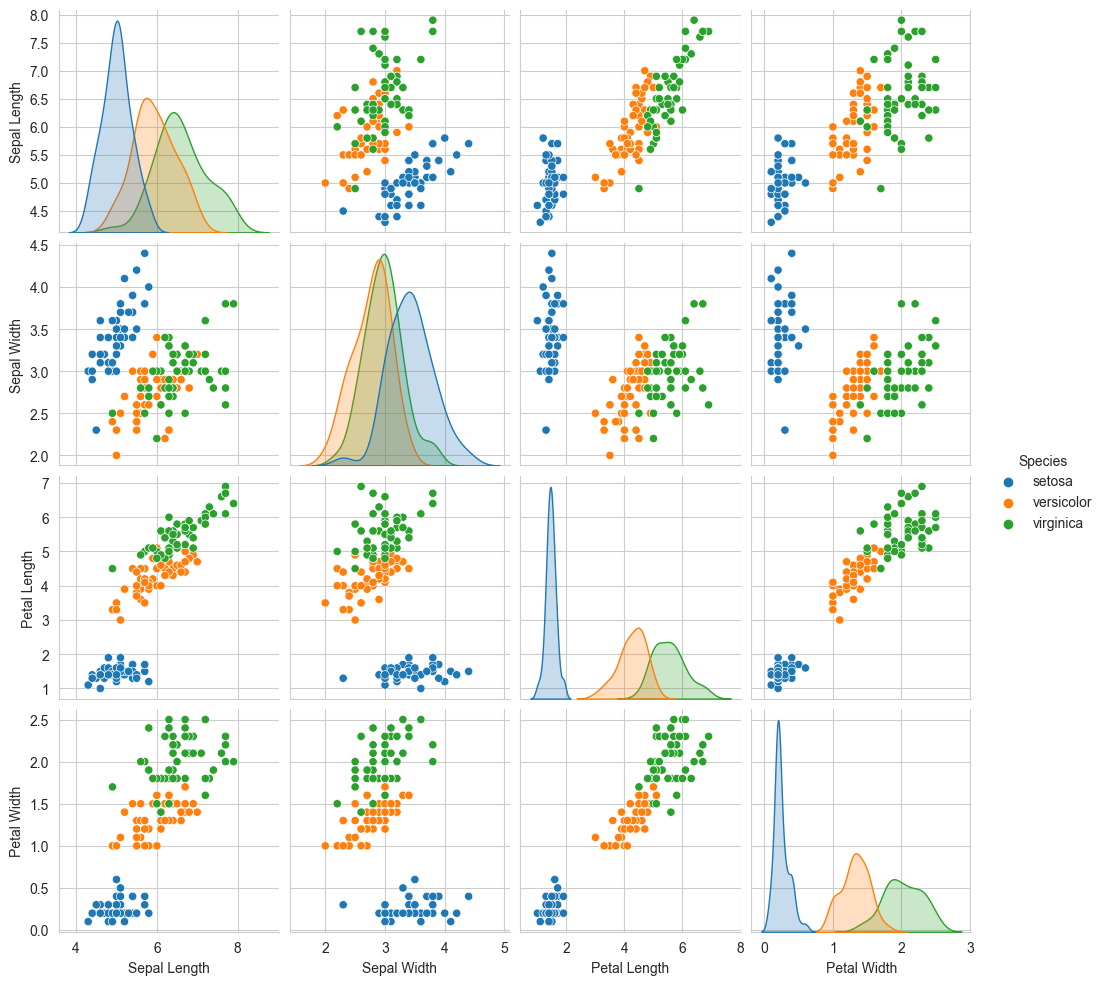

In [47]:
# display pair plot figures
sb.pairplot(df, hue='Species')